In [7]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
from sklearn.preprocessing import LabelEncoder, OneHotEncoder
from sklearn.preprocessing import StandardScaler
from matplotlib import pyplot as plt
from sklearn.linear_model import LogisticRegression
from sklearn.linear_model import LinearRegression
from sklearn.naive_bayes import GaussianNB
from sklearn.naive_bayes import MultinomialNB
from sklearn.naive_bayes import BernoulliNB
from sklearn import metrics
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier,AdaBoostClassifier, GradientBoostingClassifier
from xgboost import XGBClassifier
from sklearn.metrics import accuracy_score
from sklearn import metrics
import scipy.cluster.hierarchy as sch
from sklearn import tree
from sklearn.metrics import confusion_matrix
import warnings
warnings.filterwarnings('ignore')

In [8]:
mall=pd.read_csv("Mall_Customers.csv")
mall.head()

,CustomerID,Genre,Age,Income,SpendingScore
0,1,Male,19,15,39
1,2,Male,21,15,81
2,3,Female,20,16,6
3,4,Female,23,16,77
4,5,Female,31,17,40


In [9]:
df=mall[['Income','SpendingScore']]
df.head()

,Income,SpendingScore
0,15,39
1,15,81
2,16,6
3,16,77
4,17,40


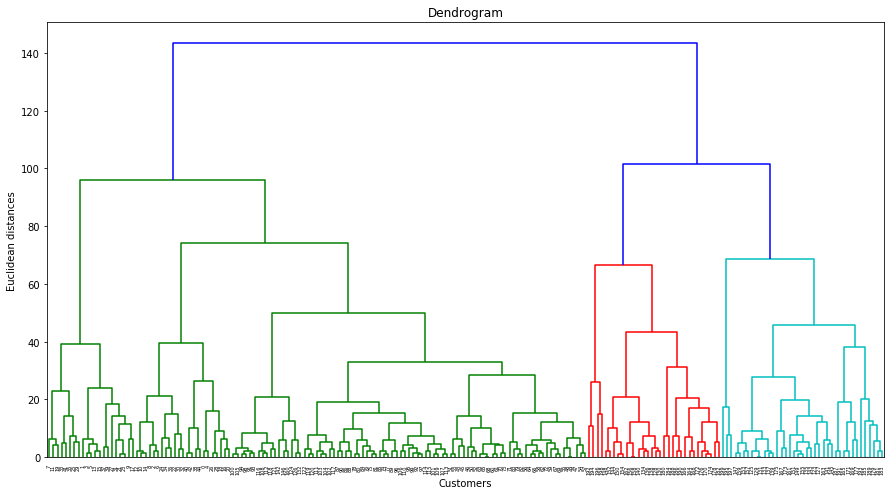

In [10]:

plt.figure(figsize=(15,8))
dendrogram=sch.dendrogram(sch.linkage(df,method='complete'))
plt.title('Dendrogram')
plt.xlabel('Customers')
plt.ylabel('Euclidean distances')
plt.show()

In [11]:
from sklearn.cluster import AgglomerativeClustering
hc=AgglomerativeClustering(n_clusters=3, affinity='euclidean',
                          linkage='complete')

y_hc=hc.fit_predict(df)

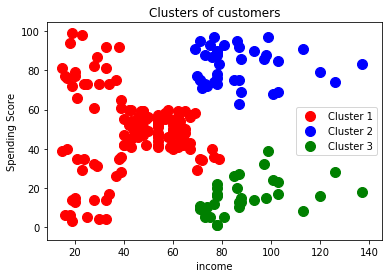

In [12]:
plt.scatter(df[y_hc==0]['Income'],df[y_hc==0]['SpendingScore'], s=100, c='red',label='Cluster 1')
plt.scatter(df[y_hc==1]['Income'],df[y_hc==1]['SpendingScore'], s=100, c='blue',label='Cluster 2')
plt.scatter(df[y_hc==2]['Income'],df[y_hc==2]['SpendingScore'], s=100, c='green',label='Cluster 3')
#plt.scatter(df[y_means==3]['Income'],df[y_means==3]['SpendingScore'], s=100, c='cyan',label='Cluster 4')
#plt.scatter(df[y_means==4]['Income'],df[y_means==4]['SpendingScore'], s=100, c='pink',label='Cluster 5')

plt.title('Clusters of customers')
plt.xlabel('income')
plt.ylabel('Spending Score')
plt.legend()
plt.show()

In [13]:
hc.labels_

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 1, 2, 1, 2, 1,
       0, 1, 2, 1, 2, 1, 2, 1, 2, 1, 0, 1, 2, 1, 0, 1, 2, 1, 2, 1, 2, 1,
       2, 1, 2, 1, 2, 1, 0, 1, 2, 1, 2, 1, 2, 1, 2, 1, 2, 1, 2, 1, 2, 1,
       2, 1, 2, 1, 2, 1, 2, 1, 2, 1, 2, 1, 2, 1, 2, 1, 2, 1, 2, 1, 2, 1,
       2, 1], dtype=int64)

In [14]:
df2= mall
df2['Class']= hc.labels_
df2.head()

,CustomerID,Genre,Age,Income,SpendingScore,Class
0,1,Male,19,15,39,0
1,2,Male,21,15,81,0
2,3,Female,20,16,6,0
3,4,Female,23,16,77,0
4,5,Female,31,17,40,0


In [15]:
label_encoder=LabelEncoder()
df2['labels_cat']=label_encoder.fit_transform(df2['Genre'])
df2.head()

,CustomerID,Genre,Age,Income,SpendingScore,Class,labels_cat
0,1,Male,19,15,39,0,1
1,2,Male,21,15,81,0,1
2,3,Female,20,16,6,0,0
3,4,Female,23,16,77,0,0
4,5,Female,31,17,40,0,0


In [16]:
X=df2[['Age','SpendingScore','labels_cat','Income']]
y=df2[['Class']]

In [19]:
X_train,X_test, y_train,y_test=train_test_split(X,y, test_size=0.2, random_state=0)

In [20]:
X_train.shape

(160, 4)

# Using CC_Data:

In [22]:
data=pd.read_csv("CC_DATA.csv")
data.head()

,CUST_ID,BALANCE,BALANCE_FREQUENCY,PURCHASES,ONEOFF_PURCHASES,INSTALLMENTS_PURCHASES,CASH_ADVANCE,PURCHASES_FREQUENCY,ONEOFF_PURCHASES_FREQUENCY,PURCHASES_INSTALLMENTS_FREQUENCY,CASH_ADVANCE_FREQUENCY,CASH_ADVANCE_TRX,PURCHASES_TRX,CREDIT_LIMIT,PAYMENTS,MINIMUM_PAYMENTS,PRC_FULL_PAYMENT,TENURE
0,C10001,40.900749,0.818182,95.40,0.00,95.4,0.000000,0.166667,0.000000,0.083333,0.000000,0,2,1000.0,201.802084,139.509787,0.000000,12
1,C10002,3202.467416,0.909091,0.00,0.00,0.0,6442.945483,0.000000,0.000000,0.000000,0.250000,4,0,7000.0,4103.032597,1072.340217,0.222222,12
2,C10003,2495.148862,1.000000,773.17,773.17,0.0,0.000000,1.000000,1.000000,0.000000,0.000000,0,12,7500.0,622.066742,627.284787,0.000000,12
3,C10004,1666.670542,0.636364,1499.00,1499.00,0.0,205.788017,0.083333,0.083333,0.000000,0.083333,1,1,7500.0,0.000000,NaN,0.000000,12
4,C10005,817.714335,1.000000,16.00,16.00,0.0,0.000000,0.083333,0.083333,0.000000,0.000000,0,1,1200.0,678.334763,244.791237,0.000000,12
